<a href="https://colab.research.google.com/github/fatenchtioui/minProjettimeSerie/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
import pandas as pd
tr_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
tr_df.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


In [38]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         230090 non-null  object
 1   store        230090 non-null  int64 
 2   product      230090 non-null  int64 
 3   number_sold  230090 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.0+ MB


In [39]:
tr_df['Date'] = pd.to_datetime(tr_df['Date'])

In [40]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         230090 non-null  datetime64[ns]
 1   store        230090 non-null  int64         
 2   product      230090 non-null  int64         
 3   number_sold  230090 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 7.0 MB


In [41]:
tr_df['store'].value_counts()

0    32870
1    32870
2    32870
3    32870
4    32870
5    32870
6    32870
Name: store, dtype: int64

In [42]:
tr_df['product'].value_counts()

0    23009
1    23009
2    23009
3    23009
4    23009
5    23009
6    23009
7    23009
8    23009
9    23009
Name: product, dtype: int64

In [43]:
tr_df.set_index('Date', inplace= True)

In [44]:
tr_df

,store,product,number_sold
Date,,,
2010-01-01,0,0,801
2010-01-02,0,0,810
2010-01-03,0,0,818
2010-01-04,0,0,796
2010-01-05,0,0,808
...,...,...,...
2018-12-27,6,9,890
2018-12-28,6,9,892
2018-12-29,6,9,895


In [45]:
# Store 1 with product 1
s1p1 = tr_df[(tr_df['store'] == 0) & (tr_df['product'] == 0)]
s1p1

,store,product,number_sold
Date,,,
2010-01-01,0,0,801
2010-01-02,0,0,810
2010-01-03,0,0,818
2010-01-04,0,0,796
2010-01-05,0,0,808
...,...,...,...
2018-12-27,0,0,847
2018-12-28,0,0,854
2018-12-29,0,0,839


In [46]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

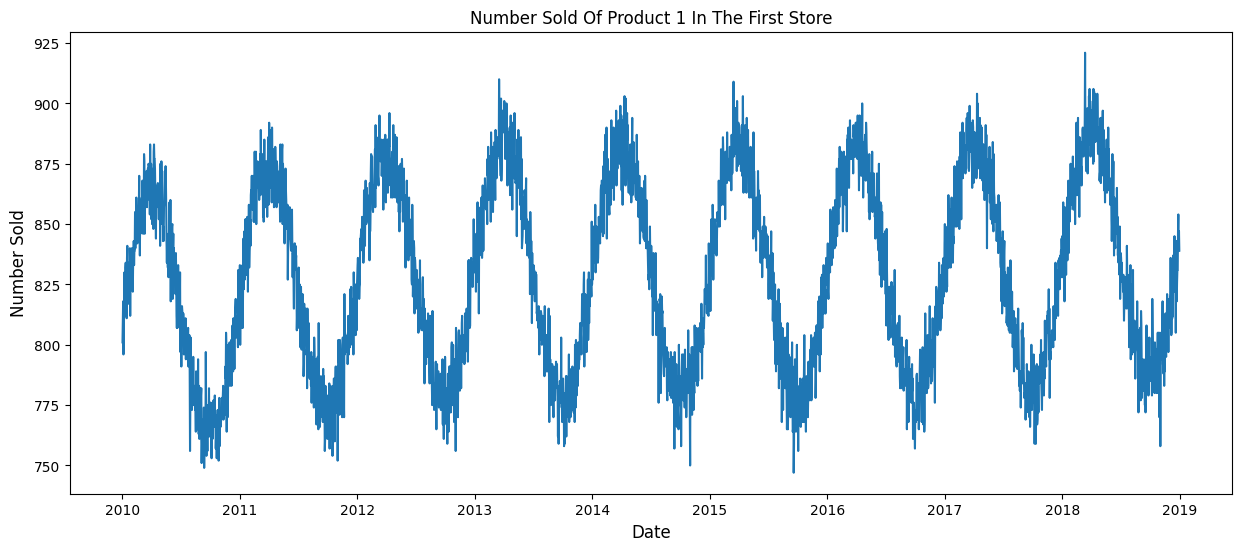

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 6))
plt.plot(s1p1.index, s1p1['number_sold'])
plt.xlabel('Date', {'fontsize': 12})
plt.ylabel('Number Sold', {'fontsize': 12})
plt.title('Number Sold Of Product 1 In The First Store')
plt.show()

In [48]:
n_cols = 1
dataset = s1p1["number_sold"]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(3287, 1)

In [49]:
# split dataset
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(s1p1, train_size=0.7, shuffle=False)

# display training dataset length
print(f"The length of training dataset is: {len(df_train)}")

# display test dataset length
print(f"The length of test dataset is: {len(df_test)}")

The length of training dataset is: 2300
The length of test dataset is: 987


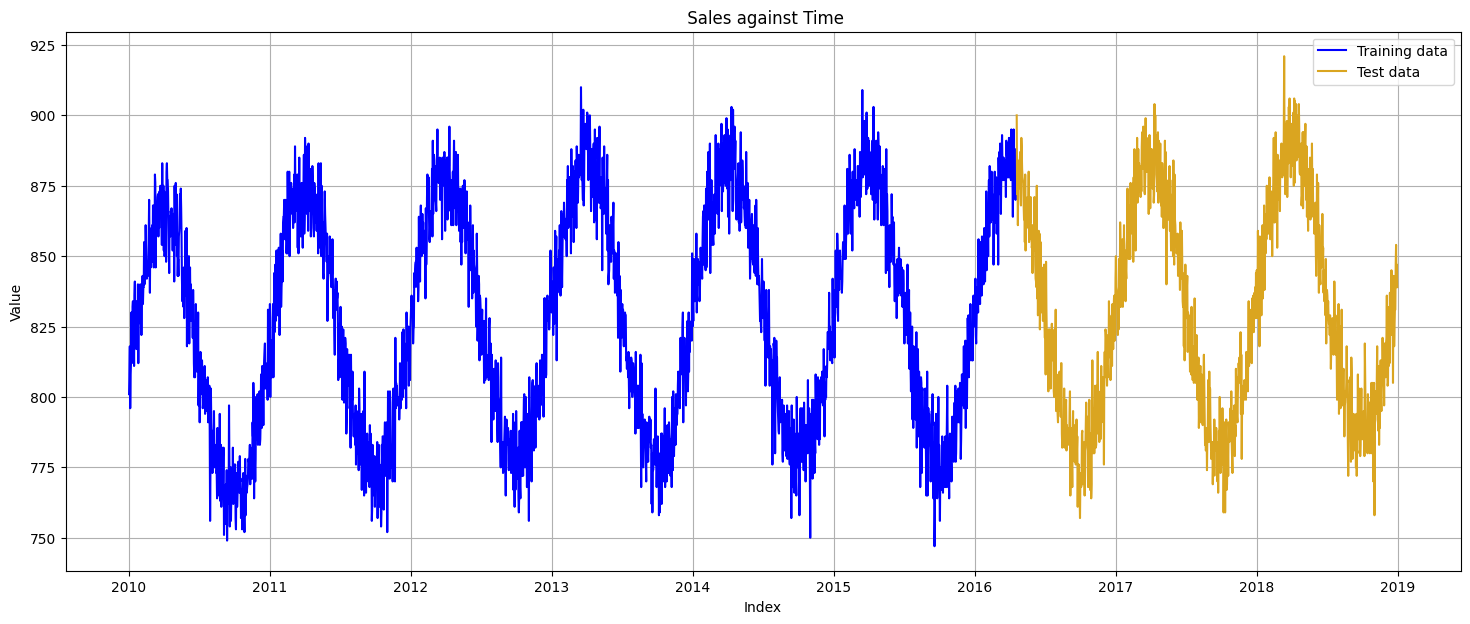

In [50]:
# plot time plot for training and test dataset 
fig, ax = plt.subplots()
fig.set_size_inches(18, 7)
ax.set_title(" Sales against Time")
ax.grid()
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.plot(
    df_train['number_sold'],
    color='blue', label='Training data');
ax.plot(
    df_test['number_sold'],
    color='goldenrod', label='Test data')
ax.legend();

In [51]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(df_train['number_sold'].values.reshape(-1,1))
test_scaled = scaler.transform(df_test['number_sold'].values.reshape(-1,1))

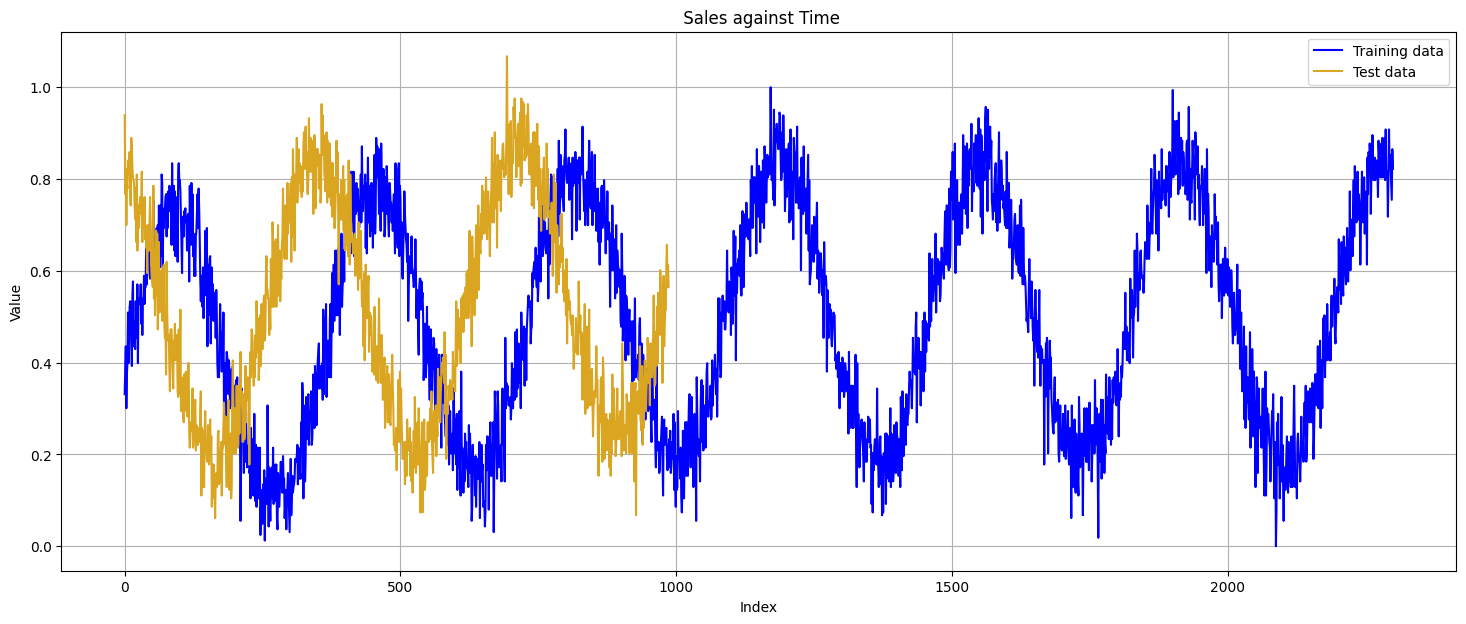

In [52]:
# plot time plot for training and test dataset 
fig, ax = plt.subplots()
fig.set_size_inches(18, 7)
ax.set_title(" Sales against Time")
ax.grid()
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.plot(
    train_scaled ,
    color='blue', label='Training data');
ax.plot(
    test_scaled,
    color='goldenrod', label='Test data')
ax.legend();

In [53]:
# function should return features in sequence and labels
def sequencing_data(data, sequence_length):
    """
    Helper function to sample sub-sequence of training data.
    Input data must be in np.ndarray.
    """
    x, y = [], []

    for i in range(data.shape[0] - sequence_length):

        # copy the sequences of data starting at this index
        x.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return x, y

# calling the helper function and store them in variables
X_sequence_train, y_sequence_train = sequencing_data(train_scaled, 3)
X_sequence_test, y_sequence_test = sequencing_data(test_scaled, 3)

# sanity check 
print("Total samples for X train: " + str(len(X_sequence_train)))
print("Total samples for y train: " + str(len(y_sequence_train)))
print("Total samples for X test: " + str(len(X_sequence_test)))
print("Total samples for y test: " + str(len(y_sequence_test)))

Total samples for X train: 2297
Total samples for y train: 2297
Total samples for X test: 984
Total samples for y test: 984


In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [55]:
from torch.utils.data import Dataset, DataLoader
class ProductDataset(Dataset):
    """
    Convert input data into torch FloatTensor. 
    Inherit Dataset class. Return length of instance when len method is called and return specific sample
    of data when indexed.
    """ 
    def __init__(self, x, y):
        self.x = torch.FloatTensor(x)
        self.y = torch.FloatTensor(y)
        
    def __len__(self):
        return self.x.size(0)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [56]:
# declare batch size
batch_size = 4

# convert into Dataset using customized class
train_Dataset = ProductDataset(X_sequence_train, y_sequence_train)
test_Dataset = ProductDataset(X_sequence_test, y_sequence_test)

# convert into DataLoader
train_loader = DataLoader(train_Dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_Dataset, batch_size=batch_size, shuffle=False)

# declare a dict object
dataloaders = {'train': train_loader, 'test': test_loader} 

In [57]:
class MLP(nn.Module):
    """MLP model with configurable input size and output size."""
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.input = nn.Linear(input_size, 64)
        self.linear1 = nn.Linear(64, 16)
        self.output = nn.Linear(16, output_size)
    
    def forward(self, x):
        x = x.view(-1, 1, 3)
        out = F.relu(self.input(x))
        out = F.relu(self.linear1(out))
        out = self.output(out)
        return out

In [58]:
# reproducibility
torch.manual_seed(38)

# setting hyperparameter
input_size = 3
output_size = 1
epochs = 100
learning_rate = 0.001

# instantiate the model
model = MLP(input_size, output_size)

# continue setting hyperparameter
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [59]:
# implement model training and validation loop
loss_score = {'train': [], 'test': []}
for epoch in range(epochs):
#     print(f'Epoch {epoch+1}/{epochs}')
    for phase in ['train', 'test']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        loss_cumsum = 0.0
        total_iterations = 0.0

        for i, (X, y) in enumerate(dataloaders[phase]):
            with torch.set_grad_enabled(phase == 'train'):
                out = model(X)
                loss = criterion(out.squeeze(), y.squeeze())

                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

            loss_cumsum += loss.item() * out.size(0)
            total_iterations += out.size(0)

        epoch_loss = loss_cumsum / total_iterations
#         print(f'{phase.upper()} Loss: {epoch_loss}')
        loss_score[phase].append(epoch_loss)

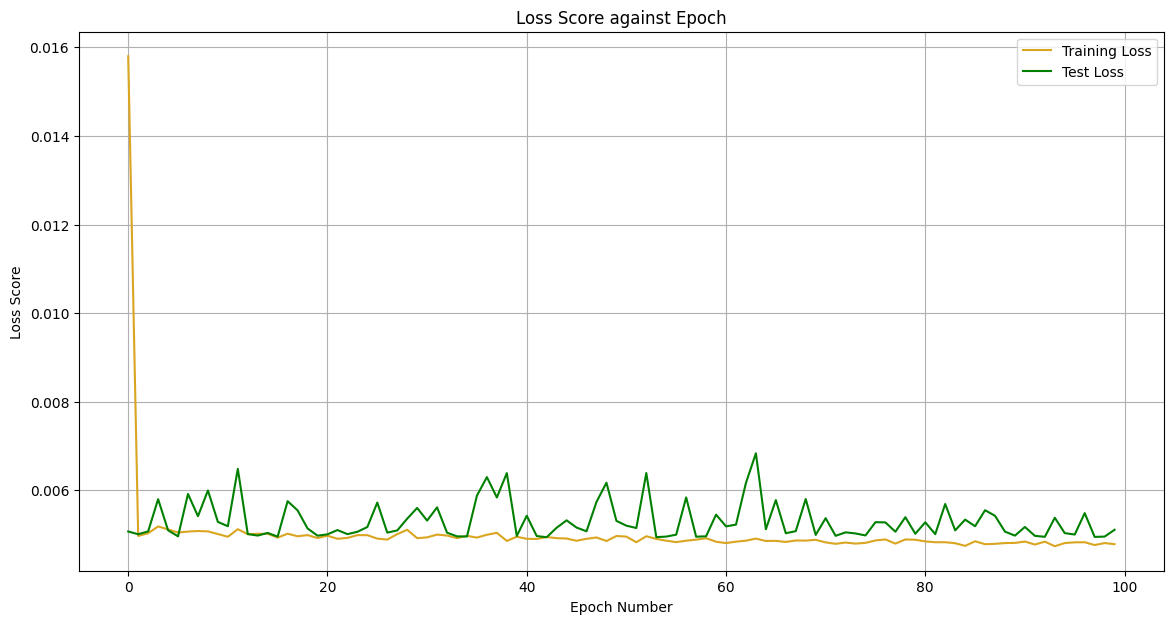

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
ax.set_title("Loss Score against Epoch")
ax.grid()
ax.set_xlabel("Epoch Number")
ax.set_ylabel("Loss Score")

ax.plot(loss_score['train'], color='goldenrod', label='Training Loss')
ax.plot(loss_score['test'], color='green', label='Test Loss')
ax.legend();

In [61]:
from sklearn.metrics import mean_squared_error
model.eval()

predictions = []
count = 0

# model predictions
with torch.no_grad():
    for i, (X, y) in enumerate(DataLoader(test_Dataset, 1)):
        count += 1
        output = model(X)
        predictions.append(output.item())
        
# convert list into np array and inverse transform it into proper values before feature scaling
predictions = np.array(predictions)
predictions = scaler.inverse_transform(predictions.reshape(1,-1))

# remove beginning 3 rows of data since at least 3 data are needed to make a prediction
df_test = df_test.iloc[3:]
df_test['preds'] = predictions.squeeze()

# compute MSE
RMSE = mean_squared_error(df_test.preds, df_test.number_sold, squared=False)
print(f"The RMSE for the model is {RMSE}")

The RMSE for the model is 11.65160472910413


<ipython-input-61-25eed7c5368d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['preds'] = predictions.squeeze()


Date
2016-04-22    880.370679
2016-04-23    870.624411
2016-04-24    870.516481
2016-04-25    868.259820
2016-04-26    874.531804
                 ...    
2018-12-27    827.668159
2018-12-28    835.477062
2018-12-29    843.031452
2018-12-30    845.566590
2018-12-31    846.058343
Name: preds, Length: 984, dtype: float64


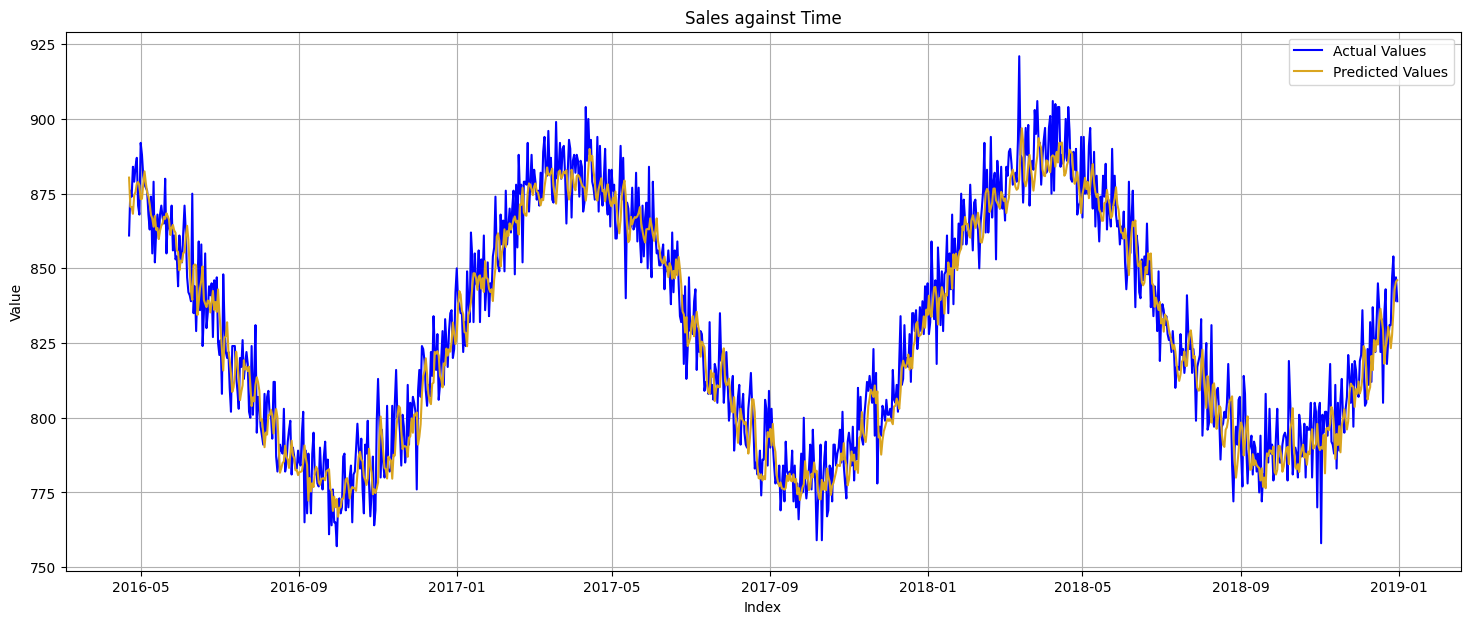

In [63]:
print(df_test['preds'])

# plot time plot for predictions and ground truth 
fig, ax = plt.subplots()
fig.set_size_inches(18, 7)
ax.set_title("Sales against Time")
ax.grid()
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.plot(
    df_test['number_sold'],
    color='blue', label='Actual Values');
ax.plot(
    df_test['preds'],
    color='goldenrod', label='Predicted Values')
ax.legend();